Q1. The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

In [1]:
import pandas as pd
import json
df = pd.read_csv('zomato.csv',encoding='latin-1')
df =df[df['Country Code'] == 1]
df1 = df[(df['City'] == 'New Delhi')|(df['City'] == 'Gurgaon' )|(df['City'] == 'Noida')|(df['City'] == 'Faridabad')|(df['City'] == 'Ghaziabad')]
df2 = df[(df['City'] != 'New Delhi')&(df['City'] != 'Gurgaon' )&(df['City'] != 'Noida')&(df['City'] != 'Faridabad')&(df['City'] != 'Ghaziabad')]

1. Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

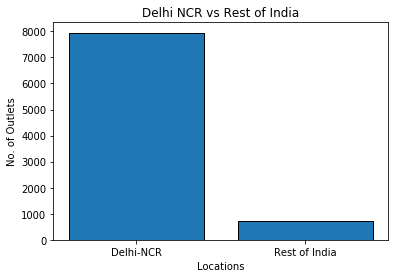

In [5]:
import matplotlib.pyplot as plt
plt.bar(['Delhi-NCR','Rest of India'],[len(df1),len(df2)],edgecolor = 'black')
plt.xlabel('Locations')
plt.ylabel('No. of Outlets')
plt.title('Delhi NCR vs Rest of India')
plt.show()

2. Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.


In [6]:
 def diff(array):
        lists = []
        for i in array:
            if ','not in i:
                if lists.count(i) == 0:
                    lists.append(i)
            else:
                string = i.strip().split(', ')
                for j in string:
                    if lists.count(j) == 0:
                        lists.append(j)
        return lists
cuisines1 = diff(df1['Cuisines'])
cuisines2 = diff(df2['Cuisines'])
for i in cuisines2:
    if cuisines1.count(i) == 0:
        print(i)

German
Malwani
BBQ
Cajun


Number of places that offer BBQ: 94
Number of places that offer German: 1
Number of places that offer Cajun: 0
Number of places that offer Malwani: 0


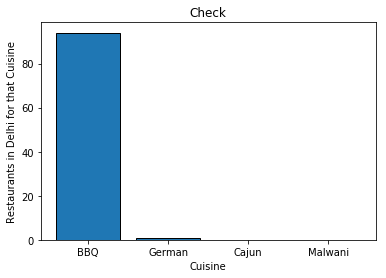

In [23]:
import requests
header = {'user-key':'9c13f303eaf124c3235833edf03cf778'}
param = {'lat':28.4020,'lon':76.8260,'cuisines':193}
res = requests.get('https://developers.zomato.com/api/v2.1/search', params = param, headers = header)
print('Number of places that offer BBQ:',res.json().get('results_found'))

param = {'lat':28.4020,'lon':76.8260,'cuisines':134}
res = requests.get('https://developers.zomato.com/api/v2.1/search', params = param, headers = header)
print('Number of places that offer German:',res.json().get('results_found'))

param = {'lat':28.4020,'lon':76.8260,'cuisines':491}
res = requests.get('https://developers.zomato.com/api/v2.1/search', params = param, headers = header)
print('Number of places that offer Cajun:',res.json().get('results_found'))

param = {'lat':28.4020,'lon':76.8260,'cuisines':71}
res = requests.get('https://developers.zomato.com/api/v2.1/search', params = param, headers = header)
print('Number of places that offer Malwani:',res.json().get('results_found'))

plt.bar(['BBQ','German','Cajun','Malwani'],[94,1,0,0],edgecolor = 'black')
plt.xlabel('Cuisine')
plt.ylabel('Restaurants in Delhi for that Cuisine')
plt.title('Check')
plt.show()

From the above answer, it can be noted that the data set is incomplete

3. Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.


In [8]:
def diff(array):
    lists =[]
    for i in array:
        if ',' not in i:
                lists.append(i)
        else:
            string=i.strip().split(', ')
            for j in string:
                lists.append(j)
    return lists
cuisine1 =pd.DataFrame(diff(df1['Cuisines']))[0].value_counts()
cuisine2 = pd.DataFrame(diff(df2['Cuisines']))[0].value_counts()
print('Delhi - NCR:')
amt1,val1,amt2,val2=[],[],[],[]
for i in range(10):
    amt1.append(cuisine1.index[i])
    val1.append(cuisine1[i])
    print(cuisine1.index[i], cuisine1[i])
print('------')
print('Rest of India:')
for i in range(10):
    amt2.append(cuisine2.index[i])
    val2.append(cuisine2[i])
    print(cuisine2.index[i], cuisine2[i])

Delhi - NCR:
North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535
------
Rest of India:
North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


4. Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

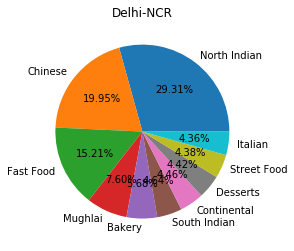

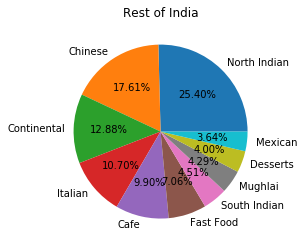

In [9]:
plt.pie(val1,labels=amt1, autopct ='%.2f%%')
plt.title('Delhi-NCR')
plt.show()
plt.pie(val2,labels=amt2, autopct ='%.2f%%')
plt.title('Rest of India')
plt.show()

Q2. User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant

1. Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.


    a. Number of Votes given Restaurant

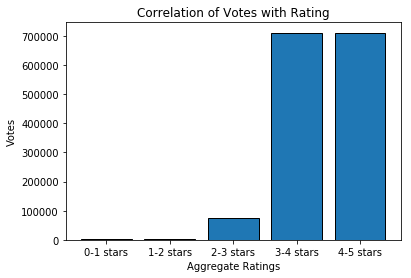

In [86]:
df = pd.read_csv('zomato.csv',encoding='latin-1')
ag = list(df['Aggregate rating'])
votes = list(df['Votes']) 
lists =list(0 for i in range(5))
for i in range(len(ag)):
    if(ag[i] <= 1):
        lists[0] += votes[i]
    elif(ag[i] <= 2):
        lists[1] += votes[i]
    elif(ag[i] <= 3):
        lists[2] += votes[i]
    elif(ag[i] <= 4):
        lists[3] += votes[i]
    else:
        lists[4] += votes[i]
plt.bar(['0-1 stars','1-2 stars','2-3 stars','3-4 stars','4-5 stars'], lists, edgecolor = 'black')
plt.title('Correlation of Votes with Rating')
plt.xlabel('Aggregate Ratings')
plt.ylabel('Votes')
plt.show()

    b. Restaurant serving more number of cuisines

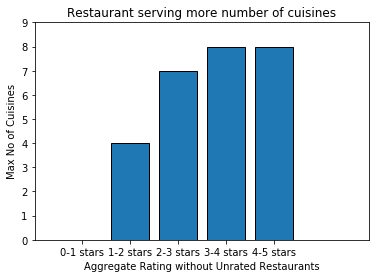

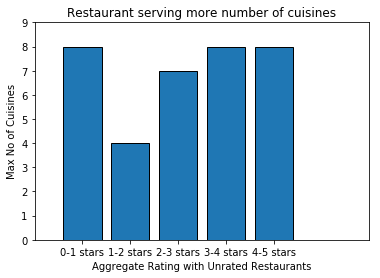

In [85]:
def diff(array):
    lists =[]
    for i in array:
        if ',' not in i:
            lists.append(1)
        else:
            string=i.strip().split(', ')
            lists.append(len(string))
    return lists
df = pd.read_csv('zomato.csv',encoding='latin-1')
ag = list(df['Aggregate rating'])
cuisines = diff(df['Cuisines'].astype(str))
df =pd.DataFrame(list(zip(ag, cuisines)), columns =['Ag','Cuisines'])
max_0 = df[(df['Ag'] <= 1)].describe()['Cuisines']['max']
max_1 = df[(df['Ag'] >0) & (df['Ag'] <= 1)].describe()['Cuisines']['max']
max_2 = df[(df['Ag'] > 1 ) & (df['Ag']<=2)].describe()['Cuisines']['max']
max_3 = df[(df['Ag'] > 2) & (df['Ag']<=3)].describe()['Cuisines']['max']
max_4 = df[(df['Ag'] > 3) & (df['Ag']<=4)].describe()['Cuisines']['max']
max_5 = df[(df['Ag'] > 4) & (df['Ag']<=5)].describe()['Cuisines']['max']
plt.bar(['0-1 stars','1-2 stars','2-3 stars','3-4 stars','4-5 stars'],[max_1,max_2,max_3,max_4,max_5], edgecolor = 'black')
plt.axis([-1, 6, 0, 9])
plt.ylabel('Max No of Cuisines')
plt.xlabel('Aggregate Rating without Unrated Restaurants')
plt.title('Restaurant serving more number of cuisines')
plt.show()
plt.bar(['0-1 stars','1-2 stars','2-3 stars','3-4 stars','4-5 stars'],[max_0,max_2,max_3,max_4,max_5], edgecolor = 'black')
plt.axis([-1, 6, 0, 9])
plt.ylabel('Max No of Cuisines')
plt.xlabel('Aggregate Rating with Unrated Restaurants')
plt.title('Restaurant serving more number of cuisines')
plt.show()


    c. Average Cost of Restaurant

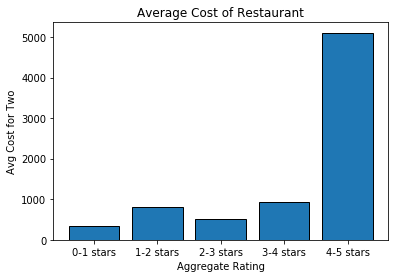

In [81]:
df = pd.read_csv('zomato.csv',encoding='latin-1')
ag = list(df['Aggregate rating'])
cost = list(df['Average Cost for two'])
df = pd.DataFrame(list(zip(ag,cost)), columns = ['ag','cost'])
avg1 = df[df['ag']<1.5].describe()['cost']['mean']
avg2 = df[(df['ag']>1)&(df['ag']<=2)].describe()['cost']['mean']
avg3 = df[(df['ag']>2)&(df['ag']<=3)].describe()['cost']['mean']
avg4 = df[(df['ag']>3)&(df['ag']<=4)].describe()['cost']['mean']
avg5 = df[(df['ag']>4)&(df['ag']<=5)].describe()['cost']['mean']
plt.bar(['0-1 stars','1-2 stars','2-3 stars','3-4 stars','4-5 stars'],[avg1,avg2,avg3,avg4,avg5], edgecolor = 'black')
plt.xlabel('Aggregate Rating')
plt.ylabel('Avg Cost for Two')
plt.title('Average Cost of Restaurant')
plt.show()

    d. Restaurant serving some specific cuisines.

Over a sample space of 50, we shall see how specific cuisines affect the user ratings.

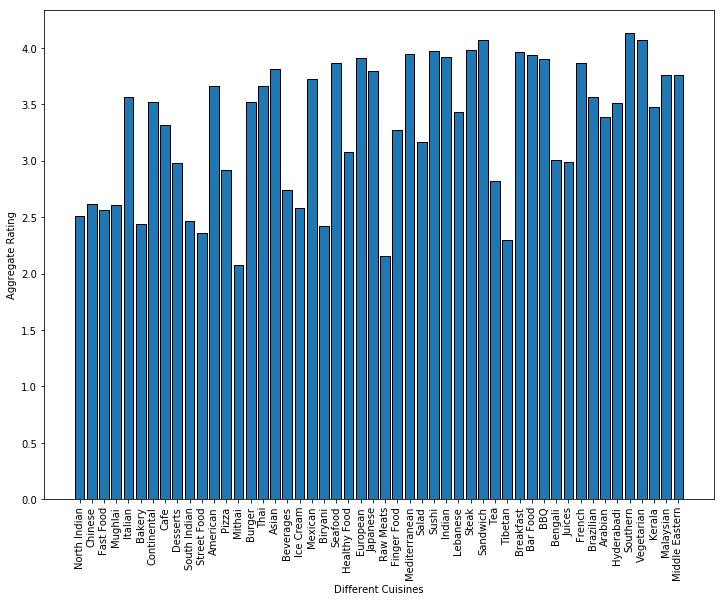

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
def diff(cus, ag):
    lists,lists2 = [],[]
    k = 0
    for i in cus:
        if ',' not in i:
                lists.append(i)
                lists2.append(ag[k])
        else:
            string=i.strip().split(', ')
            for j in string:
                lists.append(j)
                lists2.append(ag[k])
        k += 1
    return lists,lists2
df = pd.read_csv('zomato.csv',encoding='latin-1')
cuis,ag = diff(df['Cuisines'].astype(str),df['Aggregate rating'])
df = pd.DataFrame(list(zip(ag,cuis)), columns = ['ag','cuis'])
dic = {}
unique = list(df['cuis'].value_counts().index[:50])
count =[]
for i in unique:
    count.append(df[df['cuis'] == i].describe()['ag']['mean'])
plt.bar(unique, count, edgecolor = 'black')
plt.rcParams.update({'font.size': 9})
plt.rcParams["figure.figsize"]=[12,9]
plt.xticks(rotation = 90)
plt.ylabel('Aggregate Rating')
plt.xlabel('Different Cuisines')
plt.show()

2. Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
 

                                      [Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes)]

In [15]:
df = pd.read_csv('zomato.csv',encoding = 'latin-1')
df = df[['Locality','Aggregate rating','Votes']]
dic = {}
for i in range(len(df)):
    a = df['Locality'][i] 
    b = [df['Votes'][i]*df['Aggregate rating'][i], df['Votes'][i]]
    if a not in dic:
        dic[a] = b
    else:
        dic[a] = [dic.get(a)[0] + b[0],dic.get(a)[1]+b[1]]
df = pd.DataFrame.from_dict(dic, orient='index',columns= ['Sum','Total'])
df['WR'] = df['Sum'].div(df['Total'])
df.sort_values(['WR'],ascending = False, inplace = True)
df.reset_index(inplace = True)
print('Top 10 localities:')
for i in range(10):
    print(df['index'][i])

Top 10 localities:
Fort Street
Lexington Street, Soho
Old Dutch Hospital, Fort
Aminabad
West Park
Marshalltown
Gíçvea
City and Suburban
The Milk District
Windermere


Question3. Visualization

1. Plot the bar graph top 15 restaurants have a maximum number of outlets.

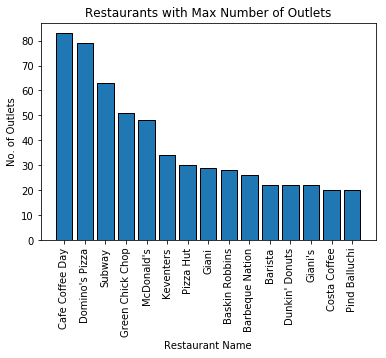

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('zomato.csv',encoding = 'latin-1')
a = df['Restaurant Name'].value_counts()[:15]
b = a.index
plt.bar(b,a, edgecolor = 'black')
plt.xticks(rotation = 90)
plt.xlabel('Restaurant Name')
plt.ylabel('No. of Outlets')
plt.title('Restaurants with Max Number of Outlets')
plt.show()

2. Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

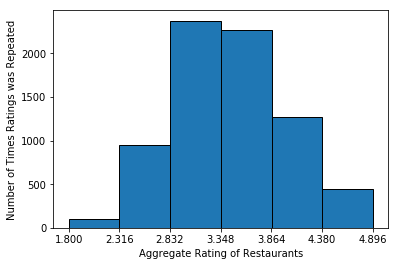

In [116]:
import numpy as np 
df = pd.read_csv('zomato.csv',encoding = 'latin-1')
df = df[df['Aggregate rating'] != 0]
xt = np.arange(1.8, 5.3, .516)
plt.hist(list(df['Aggregate rating']), edgecolor = 'black', bins = 6)
plt.ylabel('Number of Times Ratings was Repeated')
plt.xlabel('Aggregate Rating of Restaurants')
plt.xticks(xt)
plt.show()


3. Plot the bar graph top 10 restaurants in the data with the highest number of votes.

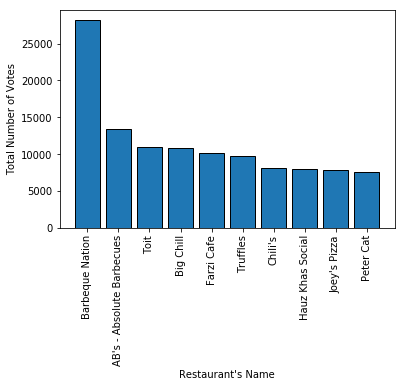

Barbeque Nation 28142
AB's - Absolute Barbecues 13400
Toit 10934
Big Chill 10853
Farzi Cafe 10098
Truffles 9682
Chili's 8156
Hauz Khas Social 7931
Joey's Pizza 7807
Peter Cat 7574


In [118]:
df = pd.read_csv('zomato.csv',encoding = 'latin-1')
df = df[['Restaurant Name','Votes']]
dic = {}
for i in range(len(df)):
    a = df['Restaurant Name'][i] 
    b = df['Votes'][i]
    if a not in dic:
        dic[a] = b
    else:
        dic[a] = dic.get(a) + b
df = pd.DataFrame.from_dict(dic, orient='index',columns= ['Votes'])
df.reset_index(inplace = True)
df.sort_values(['Votes'],ascending = False, inplace = True)
a = list(df['index'][:10])
b = list(df['Votes'][:10])
plt.bar(a,b,edgecolor = 'black')
plt.xticks(rotation = 90)
plt.xlabel('Restaurant\'s Name')
plt.ylabel('Total Number of Votes')
plt.show()
for i in range(10):
    print(a[i],b[i])

4. Plot the pie graph of top 10 cuisines present in restaurants in the USA.

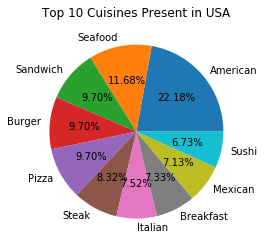

American 112
Seafood 59
Sandwich 49
Burger 49
Pizza 49
Steak 42
Italian 38
Breakfast 37
Mexican 36
Sushi 34


In [119]:
def cuis(array):
    lists =[]
    for i in array:
        if ',' not in i:
                lists.append(i)
        else:
            string=i.strip().split(', ')
            for j in string:
                lists.append(j)
    return lists
df = pd.read_csv('zomato.csv',encoding = 'latin-1')
df =df[df['Country Code'] == 216]
cuis = cuis(df['Cuisines'].astype('str'))
df = pd.DataFrame(cuis, columns =['Cuisines'])
a = df['Cuisines'].value_counts()[:10]
b = a.index
plt.pie(a, labels = b, autopct='%.2f%%')
plt.title('Top 10 Cuisines Present in USA')
plt.show()
for i in range(10):
    print(b[i], a[i])


5. Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

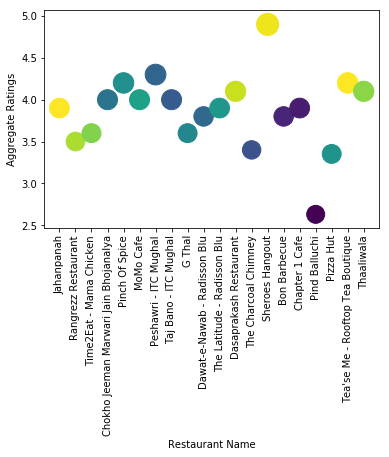

Jahanpanah 3.90 3.90
Rangrezz Restaurant 3.50 3.50
Time2Eat - Mama Chicken 3.60 3.60
Chokho Jeeman Marwari Jain Bhojanalya 4.00 4.00
Pinch Of Spice 4.20 4.20
MoMo Cafe 4.00 4.00
Peshawri - ITC Mughal 4.30 4.30
Taj Bano - ITC Mughal 4.00 4.00
G Thal 3.60 3.60
Dawat-e-Nawab - Radisson Blu 3.80 3.80
The Latitude - Radisson Blu 3.90 3.90
Dasaprakash Restaurant 4.10 4.10
The Charcoal Chimney 3.40 3.40
Sheroes Hangout 4.90 4.90
Bon Barbecue 3.80 3.80
Chapter 1 Cafe 3.90 3.90
Pind Balluchi 2.63 3.23
Pizza Hut 3.35 3.58
Tea'se Me - Rooftop Tea Boutique 4.20 4.20
Thaaliwala 4.10 4.10


In [136]:
import numpy as np
df = pd.read_csv('zomato.csv',encoding = 'latin-1')
df =df[df['Country Code'] == 1]
df.reset_index(inplace = True)
df = df[['Restaurant Name','Aggregate rating','Votes']]
dic ={}
for i in range(len(df)):
    a = df['Restaurant Name'][i] 
    b = [df['Votes'][i]*df['Aggregate rating'][i], df['Votes'][i],df['Aggregate rating'][i],1]
    if a not in dic:
        dic[a] = b
    else:
        dic[a] = [dic.get(a)[0] + b[0],dic.get(a)[1]+b[1], dic.get(a)[2] + b[2], dic.get(a)[3] + 1]
df = pd.DataFrame.from_dict(dic, orient='index',columns= ['Sum','Total','Rates', 'count'])
df['WR'] = df['Sum'].div(df['Total'])
df['Ratings'] = df['Rates'].div(df['count'])
df.reset_index(inplace = True)
k = list(df['WR'][:20] * 100)
a = list(df['index'][:20])
b = list(df['Ratings'][:20])
c = np.random.rand(20)
plt.scatter(a,b, s =k, c=c)
plt.xticks(rotation = 90)
plt.xlabel('Restaurant Name')
plt.ylabel('Aggregate Ratings')
plt.show()
for i in range(20):
    print(a[i], format(b[i],'.2f'),format(df['WR'][i],'.2f'))